In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV, KFold
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score,mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from pandas.io.parsers.readers import DataFrame
from google.colab import files
AE_csv_import = files.upload()
import io
df = pd.read_csv(io.BytesIO(AE_csv_import['scaled_data_RandomOnly.csv']))
df.head()

Saving scaled_data_RandomOnly.csv to scaled_data_RandomOnly.csv


,Unnamed: 0.1,Unnamed: 0,Packing Type,Height,specific area,void fraction,L,uG,T Corr,DelP,...,[OH-],CO2 in,CO2 out,Fractional Area,ReL,WeL E4,FrL,Who?,Glycerol,[alk]
0,0,772,RSR 0.5,0.0,0.695187,0.5,0.000000,0.0,0.139896,NaN,...,1.0,0.953704,0.464286,0.029703,NaN,NaN,NaN,Wang,NaN,NaN
1,1,773,RSR 0.5,0.0,0.695187,0.5,0.090639,0.0,0.134715,NaN,...,1.0,0.953704,0.306122,0.178218,NaN,NaN,NaN,Wang,NaN,NaN
2,2,774,RSR 0.5,0.0,0.695187,0.5,0.273403,0.0,0.150259,NaN,...,1.0,0.953704,0.214286,0.267327,NaN,NaN,NaN,Wang,NaN,NaN
3,3,775,RSR 0.5,0.0,0.695187,0.5,0.454681,0.0,0.160622,NaN,...,1.0,0.953704,0.183673,0.297030,NaN,NaN,NaN,Wang,NaN,NaN
4,4,776,RSR 0.5,0.0,0.695187,0.5,0.635958,0.0,0.165803,NaN,...,1.0,0.953704,0.178571,0.306931,NaN,NaN,NaN,Wang,NaN,NaN


In [ ]:
X_base = df[['specific area','void fraction','L','uG','T Corr','k OH E-3','DCO2 E9','HCO2 E-5','[OH-]']]
Y = df['Fractional Area'].values
X_simple = X_base[['specific area','void fraction','L','uG','T Corr']].values
X_train, X_test, Y_train, Y_test = train_test_split(X_simple, Y, test_size=0.2)


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy of filling missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in X_base
X_base = imputer.fit_transform(X_base)

In [ ]:
# create and fit the random forest regressor using X_train and Y_train
rf = RandomForestRegressor(max_depth=20, n_estimators=75, criterion='friedman_mse')
rf.fit(X_train, Y_train)

# predict Y_train and Y_test using the trained random forest regressor
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

# evaluate the performance of the random forest regressor using mean squared error
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)
train_MAE = mean_absolute_error(Y_train, Y_train_pred)
test_MAE = mean_absolute_error(Y_test, Y_test_pred)
print("MSE of X training data: ", train_mse)
print("MSE of X test data: ", test_mse)
print("r squre of X train data: ", train_r2)
print("r squre of X test data: ", test_r2)
print("MAE of X training data: ", train_MAE)
print("MAE of X test data: ", test_MAE)

MSE of X training data:  0.0003163940899040403
MSE of X test data:  0.0016844484681432736
r squre of X train data:  0.9954900520380545
r squre of X test data:  0.9651755003576485
MAE of X training data:  0.013479785478547878
MAE of X test data:  0.033313919627256945


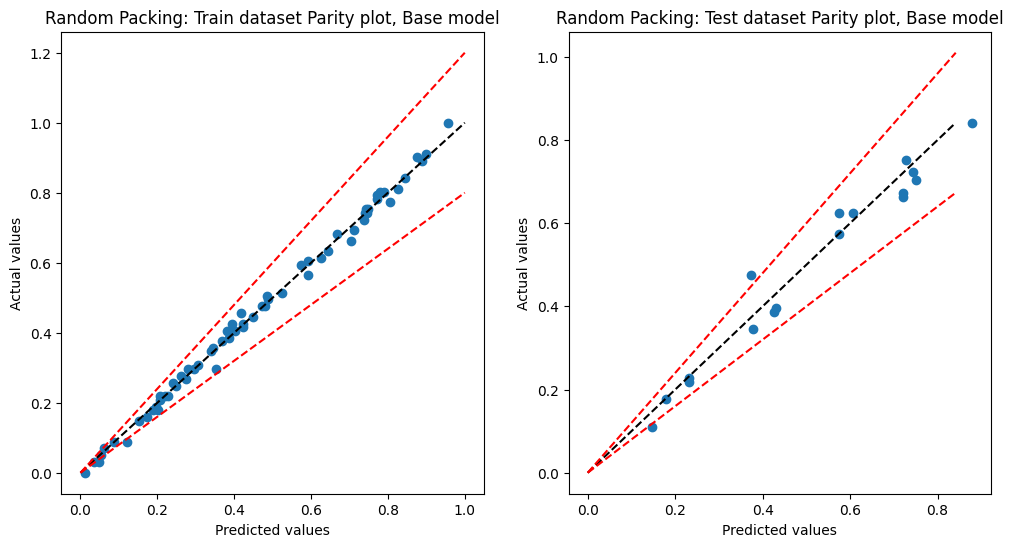

In [ ]:
# create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

error_margin = 0.2

# plot parity plot with line of best fit for training data
axs[0].scatter(Y_train_pred, Y_train)
axs[0].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100), 'k--')
axs[0].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100)*(1+ error_margin), 'r--')
axs[0].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100)*(1- error_margin), 'r--')
axs[0].set_xlabel('Predicted values')
axs[0].set_ylabel('Actual values')
axs[0].set_title('Random Packing: Train dataset Parity plot, Base model')

# plot parity plot with line of best fit for test data
axs[1].scatter(Y_test_pred, Y_test)
axs[1].plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100), 'k--')
axs[1].plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100)*(1+error_margin), 'r--')
axs[1].plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100)*(1-error_margin), 'r--')
axs[1].set_xlabel('Predicted values')
axs[1].set_ylabel('Actual values')
axs[1].set_title('Random Packing: Test dataset Parity plot, Base model')

# show the plots
plt.show()


In [ ]:
# Define number of repetitions
num_repetitions = 50

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
}

# Create a random forest regressor object
rf = RandomForestRegressor()

# Create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding mean test score
print("Best hyperparameters for X data:", grid.best_params_)
print("Best mean test score for X data:", -grid.best_score_)

# Make predictions on the test data
Y_pred = grid.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Print the evaluation metrics
print("MSE:", mse)
print("R-square:", r2)
print("MAE:", mae)

Best hyperparameters for X data: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}
Best mean test score for X data: 0.002075834433024414
MSE: 0.001862212470519047
R-square: 0.9615003849983869
MAE: 0.03462434478742007


In [ ]:
# Repeat the training and testing process with the best hyperparameters
mse_list = []
rsquared_list = []
mae_list = []

for i in range(num_repetitions):
    X_train, X_test, Y_train, Y_test = train_test_split(X_base, Y, test_size=0.2)
    # Create and fit the random forest regressor using the best hyperparameters
    rf = RandomForestRegressor(**grid.best_params_)
    rf.fit(X_train, Y_train)

    # Predict Y_train and Y_test using the trained random forest regressor
    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)

    # Evaluate the performance of the random forest regressor
    train_mse = mean_squared_error(Y_train, Y_train_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    train_rsquared = r2_score(Y_train, Y_train_pred)
    test_rsquared = r2_score(Y_test, Y_test_pred)
    train_mae = mean_absolute_error(Y_train, Y_train_pred)
    test_mae = mean_absolute_error(Y_test, Y_test_pred)

    # Append the performance metrics to the lists
    mse_list.append(test_mse)
    rsquared_list.append(test_rsquared)
    mae_list.append(test_mae)

# Calculate the mean and standard deviation of the performance metrics
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)
rsquared_mean = np.mean(rsquared_list)
rsquared_std = np.std(rsquared_list)
mae_mean = np.mean(mae_list)
mae_std = np.std(mae_list)

print("mse_mean:", mse_mean)
print("mse_std:", mse_std)
print("rsquared_mean:", rsquared_mean)
print("rsquared_std:", rsquared_std)
print("mae_mean:", mae_mean)
print("mae_std:", mae_std)

from scipy.stats import t

# Calculate the t-score for a 95% confidence interval with (num_repetitions - 1) degrees of freedom
t_score = t.ppf(0.975, num_repetitions - 1)

# Calculate the confidence intervals for the performance metrics
mse_ci = t_score * mse_std / np.sqrt(num_repetitions)
rsquared_ci = t_score * rsquared_std / np.sqrt(num_repetitions)
mae_ci = t_score * mae_std / np.sqrt(num_repetitions)

# Add the confidence intervals to the print statements
print("MSE: {:.2f} ± {:.2f}".format(mse_mean, mse_ci))
print("R-square: {:.2f} ± {:.2f}".format(rsquared_mean, rsquared_ci))
print("MAE: {:.2f} ± {:.2f}".format(mae_mean, mae_ci))


mse_mean: 0.002196925526332479
mse_std: 0.0007737797450112847
rsquared_mean: 0.964652342370016
rsquared_std: 0.011560407140567852
mae_mean: 0.036907047175305754
mae_std: 0.006747233261334191
MSE: 0.00 ± 0.00
R-square: 0.96 ± 0.00
MAE: 0.04 ± 0.00


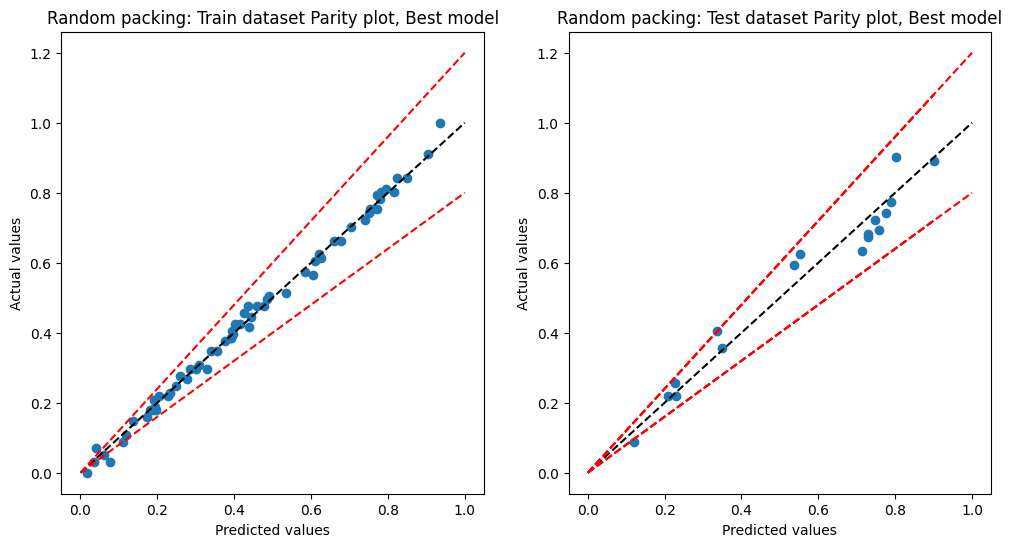

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot parity plot again using the the best hyperparameters for the training data X_simple
axs[0].scatter(Y_train_pred, Y_train)
axs[0].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100), 'k--')
axs[0].set_xlabel('Predicted values')
axs[0].set_ylabel('Actual values')
axs[0].set_title('Random packing: Train dataset Parity plot, Best model')
axs[0].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100)*(1+0.2), 'r--')
axs[0].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100)*(1-0.2), 'r--')

# Plot parity plot again using the the best hyperparameters for test data X_simple
axs[1].scatter(Y_test_pred, Y_test)
axs[1].plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100), 'k--')
axs[1].set_xlabel('Predicted values')
axs[1].set_ylabel('Actual values')
axs[1].set_title('Random packing: Test dataset Parity plot, Best model')
axs[1].plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100)*(1+0.2), 'r--')
axs[1].plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100)*(1-0.2), 'r--')

# Add the error margin lines
plt.plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100)*(1+error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_test), 100), np.linspace(0, np.max(Y_test), 100)*(1-error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100)*(1+error_margin), 'r--')
plt.plot(np.linspace(0, np.max(Y_train), 100), np.linspace(0, np.max(Y_train), 100)*(1-error_margin), 'r--')

plt.show()
